### Machine Learning 

*Machine Learning* is a set of algorithms to enable computers to make and improve predictions or behaviors based on some data. This ability is not *explicitly* programmed. It involves models with tuneable parameters, that can adapt their values based on available data. Thence, these models can generalize this knowledge and make predictions about new (and unseen) data.


Fitting lines through data. Any middle schooler could eyeball this data and draw a reasonable line through it...however, this task is not simple for a machine. 
And when we move to more complicated datasets and multiple dimensions, your middle schooler will give up.  

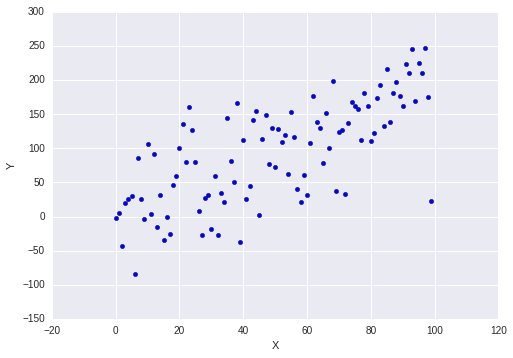

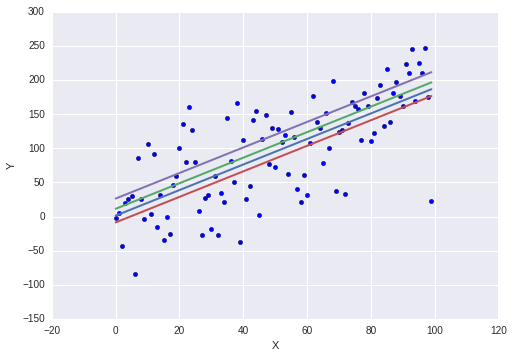

In [88]:
from IPython.core.display import Image, display
display(Image(filename='Reg1.png'))
display(Image(filename='Reg2.png'))

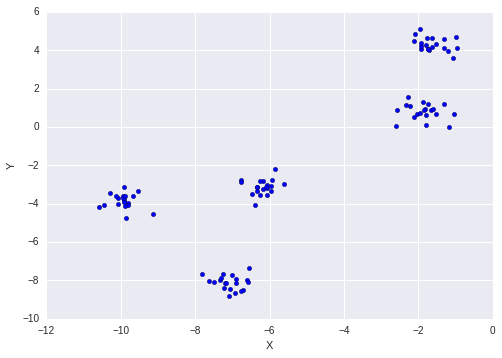

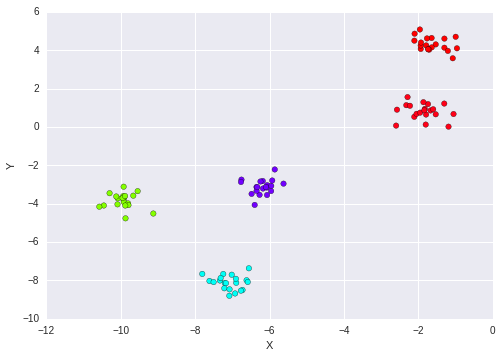

In [89]:
from IPython.core.display import Image, display
display(Image(filename='Cluster0.png'))
display(Image(filename='Cluster1.png'))

### Scikit-Learn
*Scikit-Learn* (http://scikit-learn.org) is a python package that uses *NumPy* & *SciPy* to enable the application of popular machine learning algorithms up on small to medium datasets.

Referring back to the machine learning models, every model in scikit is a python class with a uniform interface. Every instance of this class is an object and the *general* method of application is very similar.

a. *Import* class from module. (Here "abc" is an arbitrary algorithm.)
* from sklearn.ABC import abc

b. *Instantiate* estimator object 
* abc_model=abc(arguments)

c. *Fit* model to training data
* abc_model.fit(data)

d. Use fitted model to *predict* 
* abc_model.predict(new_data)



Now, we'll move from this (seemingly) abstract overview to actual application.

To motivate this discussion, lets start with a concrete problem...that of the infinite scroll.

The goal of *Clustering* is to find an arrangement in the data such that items in the same group (or cluster) are more similar to each other than those from different clusters.

The Prototype based K-Means algorithm is quiet popular. In prototype based clustering, each group is represented/exemplified by a prototype. In K-Means, the prototype is the mean (or centroid).

#### Exercise 1
Name another parameter that we could have chosen as a prototype? 
When would this parameter be more suited than the centroid?

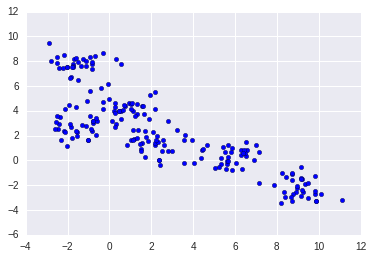

In [56]:
%matplotlib inline
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import seaborn

X, y = make_blobs(n_samples=200,n_features=2,centers=6,cluster_std=0.8, shuffle=True,random_state=0)

plt.scatter(X[:,0],X[:,1])

Steps in the K-means algorithm:

1. Choose *k* centroids from the sample points as initial cluster centers.
2. Assign each data point to the nearest centroid (based on Euclidean distance).
3. Update the centroid locations to the mean of the samples that were assigned to it.
4. Repeat steps 2 and 3 till the cluster assignments do not change, or, a pre-defined tolerance, or, a maximum number of iterations is reached.

In [10]:
#import Kmeans class for the cluster module
from sklearn.cluster import KMeans

In [11]:
#instantiate the model
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300,  tol=1e-04, random_state=0)

The arguments to the algorithm:
* n_clusters: The number of groups to be divided in.
* n_init: The number of different initial random centroids to be run.
* max_iter: The maximum number of iterations for each single run.
* tol: Cut-off for the changes in the within-cluster sum-squared-error.

In [13]:
#fitting the model to the data 
y_km = km.fit_predict(X)

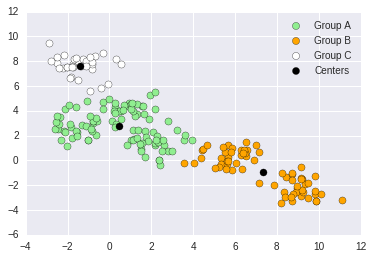

In [24]:
plt.scatter(X[y_km==0,0], X[y_km ==0,1], s=50, c='lightgreen', marker='o', label='Group A')
plt.scatter(X[y_km ==1,0], X[y_km ==1,1], s=50, c='orange', marker='o', label='Group B')
plt.scatter(X[y_km ==2,0], X[y_km ==2,1], s=50, c='white', marker='o', label='Group C')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=50, marker='o', c='black', label='Centers')
plt.legend()

#### Exercise 2
Clustering the iris dataset based on sepal and petal lengths and widths.

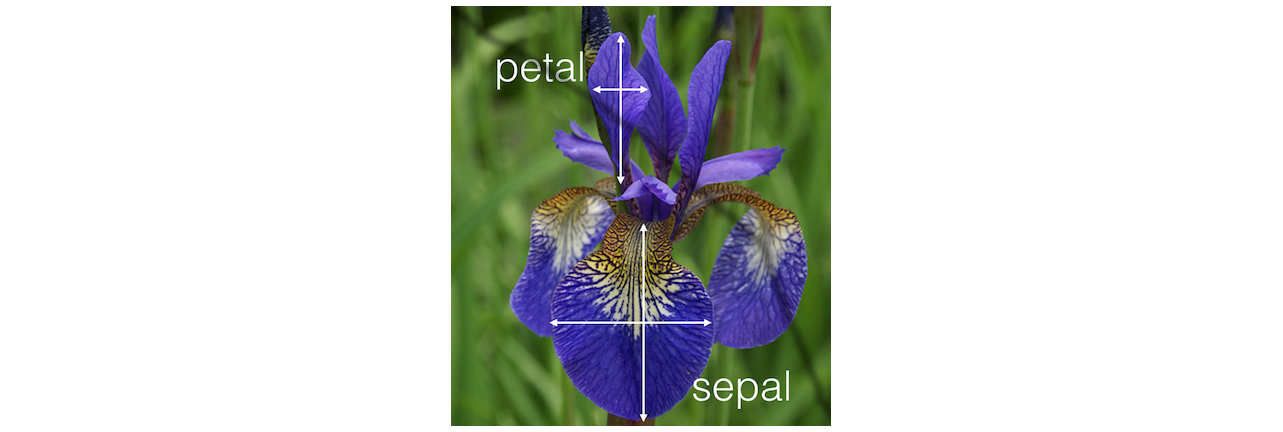

In [92]:
display(Image(filename='1.png'))

In [38]:
from sklearn.datasets import load_iris
iris = load_iris()
n_samples, n_features = iris.data.shape
X, y = iris.data, iris.target

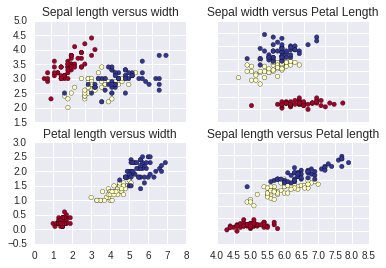

In [39]:
f, axarr = plt.subplots(2, 2)
axarr[0, 0].scatter(iris.data[:, 0], iris.data[:, 1],c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
axarr[0, 0].set_title('Sepal length versus width')
axarr[0, 1].scatter(iris.data[:, 1], iris.data[:, 2],c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
axarr[0, 1].set_title('Sepal width versus Petal Length')
axarr[1, 0].scatter(iris.data[:, 2], iris.data[:, 3],c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
axarr[1, 0].set_title('Petal length versus width')
axarr[1, 1].scatter(iris.data[:, 0], iris.data[:, 2],c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
axarr[1, 1].set_title('Sepal length versus Petal length')
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False);
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False);

In [53]:
k_means = KMeans(n_clusters=2, n_init=10, max_iter=1000, random_state=0)
k_means.fit(X)
y_pred = k_means.predict(X)

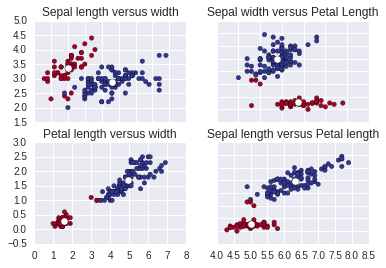

In [54]:
f, axarr = plt.subplots(2, 2)
axarr[0, 0].scatter(iris.data[:, 0], iris.data[:, 1],c=y_pred, cmap=plt.cm.get_cmap('RdYlBu', 3))
axarr[0, 0].scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1], s=50, marker='o', c='white', label='Centers')
axarr[0, 0].set_title('Sepal length versus width')
axarr[0, 1].scatter(iris.data[:, 1], iris.data[:, 2],c=y_pred, cmap=plt.cm.get_cmap('RdYlBu', 3))
axarr[0, 1].scatter(k_means.cluster_centers_[:,1],k_means.cluster_centers_[:,2], s=50, marker='o', c='white', label='Centers')
axarr[0, 1].set_title('Sepal width versus Petal Length')
axarr[1, 0].scatter(iris.data[:, 2], iris.data[:, 3],c=y_pred, cmap=plt.cm.get_cmap('RdYlBu', 3))
axarr[1, 0].scatter(k_means.cluster_centers_[:,2],k_means.cluster_centers_[:,3], s=50, marker='o', c='white', label='Centers')
axarr[1, 0].set_title('Petal length versus width')
axarr[1, 1].scatter(iris.data[:, 0], iris.data[:, 2],c=y_pred, cmap=plt.cm.get_cmap('RdYlBu', 3))
axarr[1, 1].scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,2], s=50, marker='o', c='white', label='Centers')
axarr[1, 1].set_title('Sepal length versus Petal length')
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False);
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False);

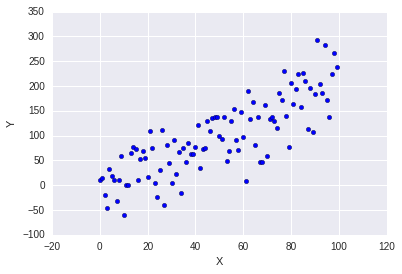

In [57]:
x=np.arange(100)
eps=50*np.random.randn(100)
y=2*x+eps
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")

In [59]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True)
X=x[:,np.newaxis]

In [60]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [61]:
X_fit=x[:,np.newaxis]
y_pred=model.predict(X_fit)

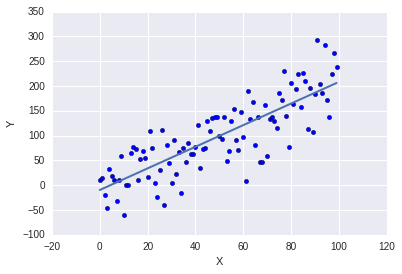

In [62]:
plt.scatter(x,y)
plt.plot(X_fit,y_pred,linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")

In [63]:
print model.coef_
print model.intercept_
#So a unit change is X is associated with a ___ change in Y.

[ 2.1791764]
-9.65803997469


### Exercise 3
Linear Regression over a multi-dimensional data set. The data exhibits the advertising expenditure over TV, radio and the print media, versus the change in sales of the product.

In [65]:
import pandas as pd
data=pd.read_csv('addata.csv', index_col=0)
data.head(3)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


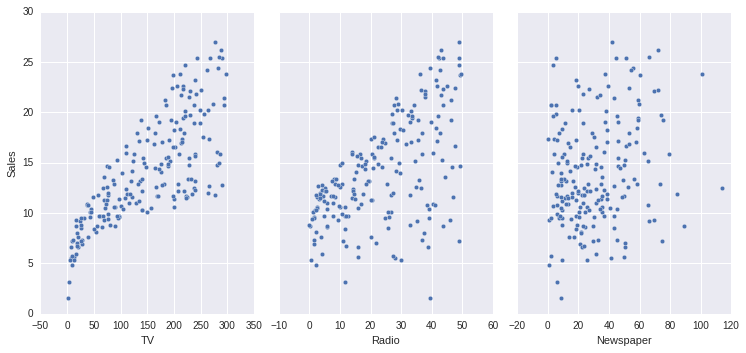

In [68]:
import seaborn as sns
sns.pairplot(data,x_vars=["TV","Radio","Newspaper"],y_vars="Sales",size=5, aspect=0.7)

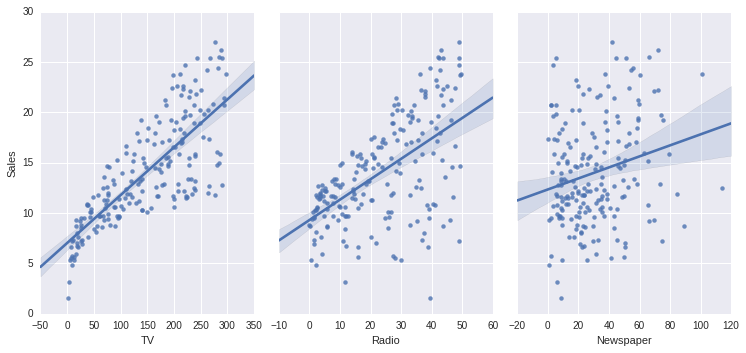

In [69]:
sns.pairplot(data,x_vars=["TV","Radio","Newspaper"],y_vars="Sales",size=5, aspect=0.7,kind='reg')

In [78]:
#from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [79]:
clf=linear_model.LinearRegression()

In [80]:
feature_cols=["TV","Radio","Newspaper"]
X=data[feature_cols]
y=data["Sales"]

In [81]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [86]:
clf.fit(X_train, y_train)
print clf.coef_

[ 0.04656457  0.17915812  0.00345046]


In [83]:
y_pred=clf.predict(X_test)

In [84]:
from sklearn import metrics
print np.sqrt(metrics.mean_squared_error(y_test,y_pred)) #RMSE

1.40465142303
